Chapter 16

Question 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def my_lin_regression(f,x,y):
    a= np.array([f[i](x) for i in range(len(f))]).T
    a= np.concatenate((a,np.ones((len(x),1))),axis= 1)
    y= y[:, np.newaxis]
    r= np.linalg.pinv(a).dot(y)
    return r

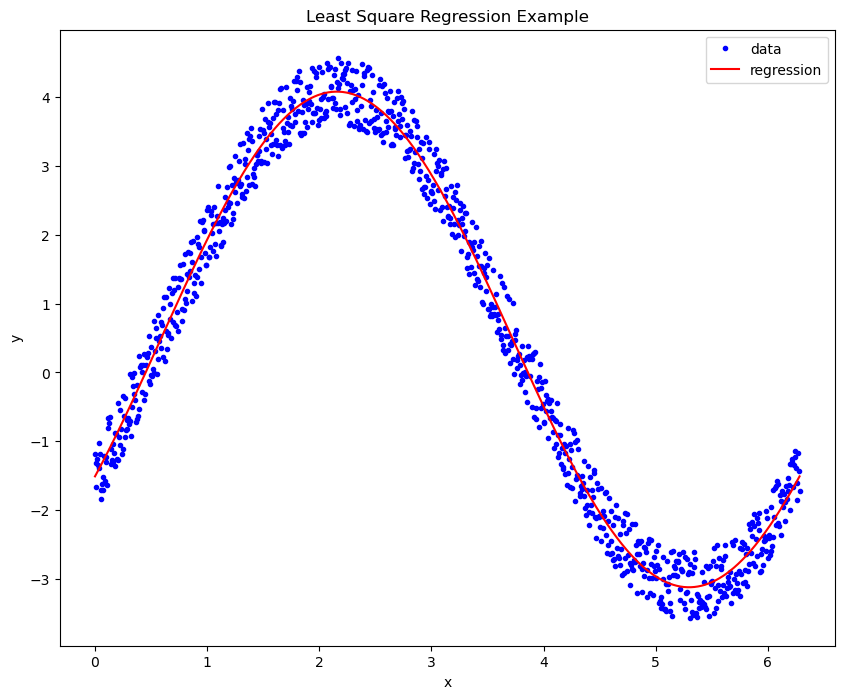

In [2]:
x = np.linspace(0, 2*np.pi, 1000)
y = 3*np.sin(x) - 2*np.cos(x) + np.random.random(len(x))
f = [np.sin, np.cos]
beta = my_lin_regression(f, x, y)
plt.figure(figsize = (10,8))
plt.plot(x,y,"b.", label = "data")
plt.plot(x, beta[0]*f[0](x)+beta[1]*f[1](x)+beta[2], "r", label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Least Square Regression Example")
plt.legend()
plt.show()

Question 6

In [3]:
import matplotlib.pyplot as plt
import numpy as np
def my_exp_regression(x,y):
    A = np.vstack([x, np.ones(len(x))]).T
    b, log_a = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
    a = np.exp(log_a)
    return (a,b)

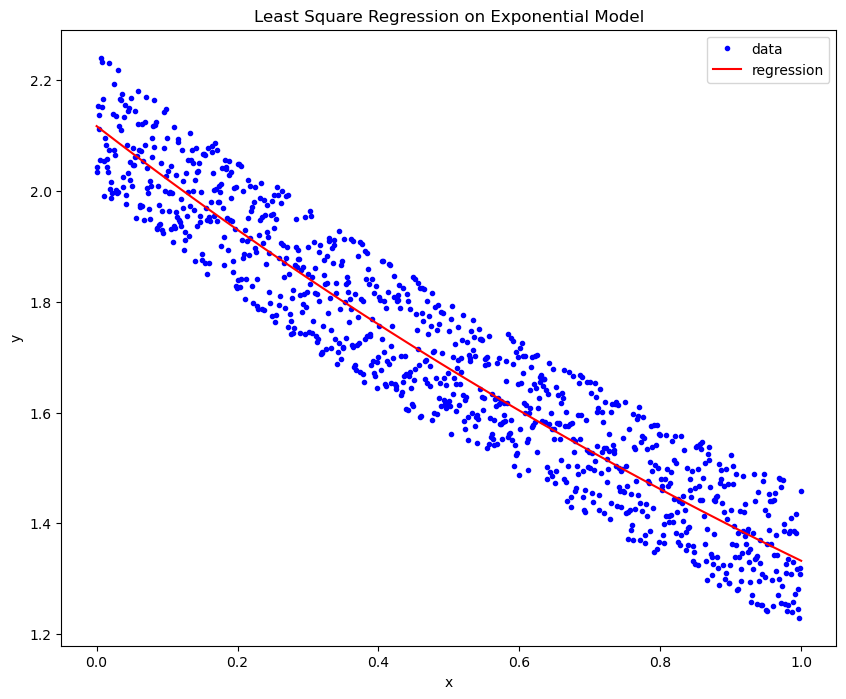

In [4]:
x = np.linspace(0, 1, 1000)
y = 2*np.exp(-0.5*x) + 0.25*np.random.random(len(x))
alpha, beta = my_exp_regression(x, y)
plt.figure(figsize = (10,8))
plt.plot(x,y,"b.", label = "data")
plt.plot(x, alpha*np.exp(beta*x), "r", label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Least Square Regression on Exponential Model")
plt.legend()
plt.show()

Chapter 17

Question 3

In [5]:
import matplotlib.pyplot as plt
import numpy as np
def my_nearest_neighbor(x,y,X):
    l= len(x)
    Y= np.zeros_like(X,dtype= int)
    c=0
    for i in range(l):
        m=np.abs(X[i]-x[c])
        for j in range(c+1,l):
            if (np.abs(X[i]-x[j])<m):
                c=j
                m= X[i]- x[j]
        Y[i]= y[c]
    return Y

In [6]:
x = np.array([12,43,56,76,96])
y = np.array([3,67,89,1,4])
X = np.array([14,78,79,87,95])
print(my_nearest_neighbor(x, y, X))

[3 1 1 4 4]


Question 7

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
def my_interp_plotter(x,y,X, option):
    f= interp1d(x,y, kind= option)
    Y= f(X)
    plt.plot(x, y, 'ro', label = 'data points')
    plt.plot(X, Y, '-b', label = 'interpolation')
    plt.title(f'{option} interpolation of data')
    plt.xlabel('x')
    plt.ylabel('y')    
    plt.legend()
    plt.show()

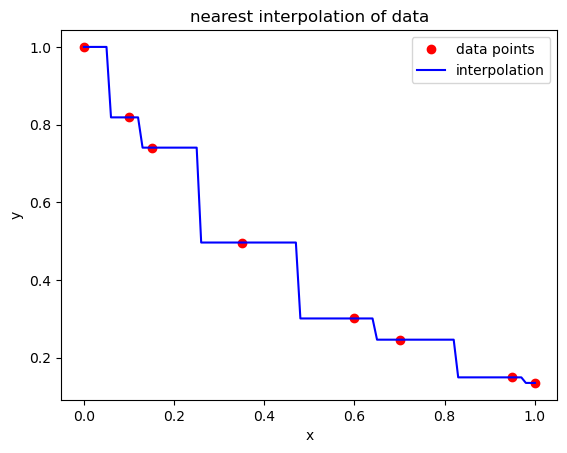

In [8]:
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y = np.array([1,0.8187,0.7408,0.4966,0.3012,0.2466,0.1496,0.1353])
my_interp_plotter(x, y, np.linspace(0, 1, 101), "nearest")

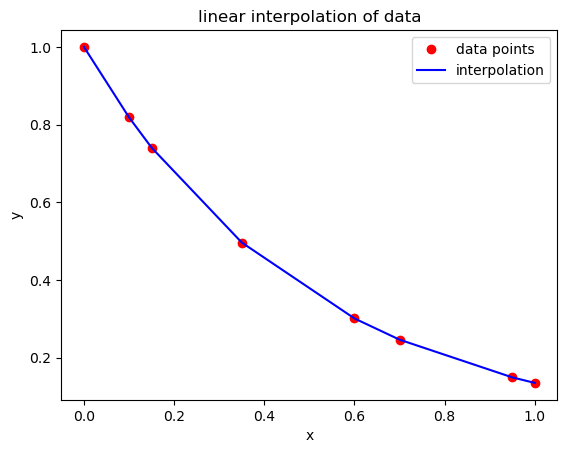

In [9]:
my_interp_plotter(x, y, np.linspace(0, 1, 101), "linear")

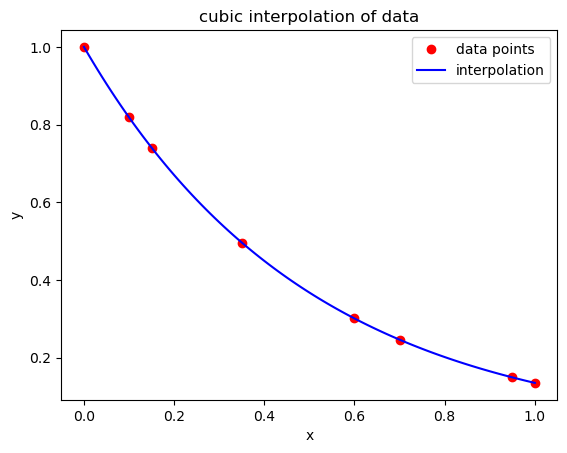

In [10]:
my_interp_plotter(x, y, np.linspace(0, 1, 101), "cubic")

Question 8

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
def my_D_cubic_spline(x, y, X, D):
    f = CubicSpline(x, y, bc_type = ((1,D), (1,D)))
    return f(X)

In [12]:
x = [0, 1, 2, 3, 4]
y = [0, 0, 1, 0, 0]
X = np.linspace(0, 4, 101)
Y = my_D_cubic_spline(x, y, 1.5, 1)
Y

array(0.54017857)

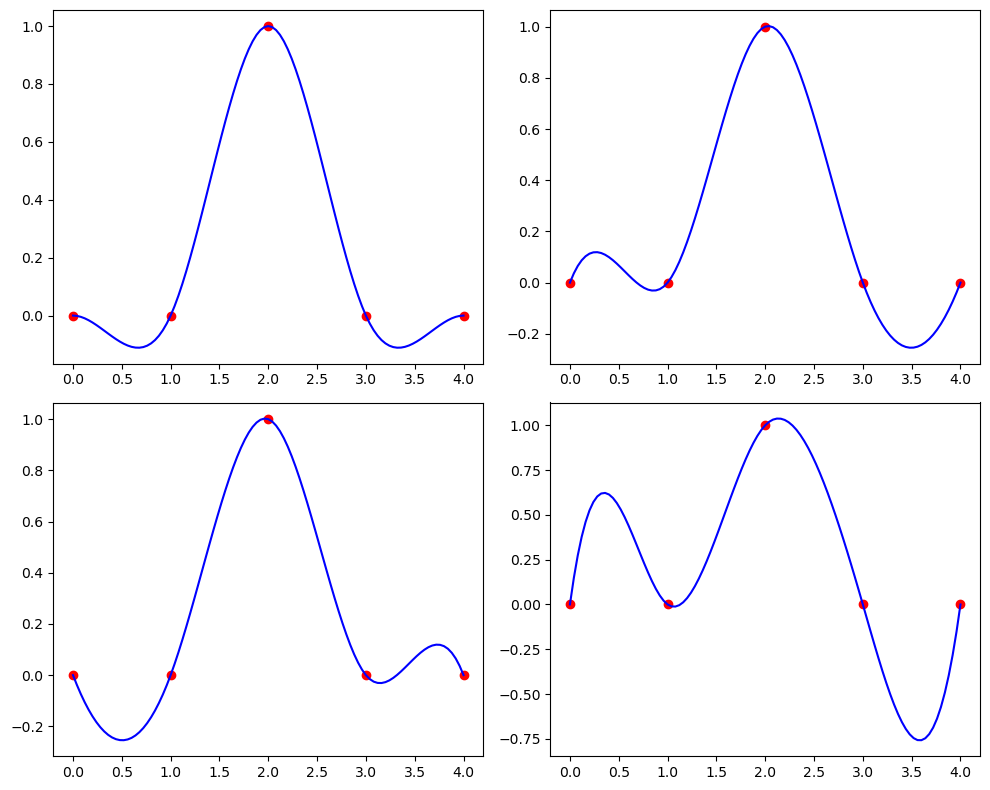

In [13]:
plt.figure(figsize = (10, 8))
plt.subplot(221)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 0), "b")
plt.subplot(222)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 1), "b")
plt.subplot(223)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, -1), "b")
plt.subplot(224)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 4), "b")
plt.tight_layout()
plt.show()

Chapter 18

 Question 4

In [14]:
import numpy as np
from math import factorial
def my_tay_approx_exp(x):
    exp = 1
    for i in range(1,8):
        exp = exp + (x**i)/factorial(i)
        print(f"Order {i} approximation: {exp}")
    m = max(1, np.exp(x))
    print('Error bound:', m*x**8/factorial(8))
    print('Actual error:', abs(np.exp(x) - exp))

In [15]:
my_tay_approx_exp(7.389)

Order 1 approximation: 8.389
Order 2 approximation: 35.6876605
Order 3 approximation: 102.9242613115
Order 4 approximation: 227.12707216054338
Order 5 approximation: 410.67398603325967
Order 6 approximation: 636.7120104675098
Order 7 approximation: 875.3112908310347
Error bound: 356588.0096320189
Actual error: 742.7759255728995


In [16]:
my_tay_approx_exp(0)

Order 1 approximation: 1.0
Order 2 approximation: 1.0
Order 3 approximation: 1.0
Order 4 approximation: 1.0
Order 5 approximation: 1.0
Order 6 approximation: 1.0
Order 7 approximation: 1.0
Error bound: 0.0
Actual error: 0.0


In [17]:
my_tay_approx_exp(-4)

Order 1 approximation: -3.0
Order 2 approximation: 5.0
Order 3 approximation: -5.666666666666666
Order 4 approximation: 5.0
Order 5 approximation: -3.533333333333333
Order 6 approximation: 2.155555555555556
Order 7 approximation: -1.095238095238095
Error bound: 1.6253968253968254
Actual error: 1.1135537341268291
